![alt text](image-1.png)

![alt text]({925353A3-B79D-45E7-8DD1-57D965B27204}.png)

### versão 1

In [1]:
import math

# constantes e condições iniciais
g    = 9.8                     # m/s²
θ    = math.radians(30)        # ângulo de 30°
v0   = 20.0                    # m/s
h0   = 45.0                    # m
dt   = 0.1                     # passo de tempo (s)

# componentes iniciais da velocidade
vx = v0 * math.cos(θ)
vy = v0 * math.sin(θ)

# estado inicial
t = 0.0
x = 0.0
y = h0

# cabeçalho alinhado
print(f"{'t (s)':>6} | {'x (m)':>8} | {'y (m)':>8} | {'vx (m/s)':>10} | {'vy (m/s)':>10} | {'|v| (m/s)':>10}")
print("-" * 66)

# loop até colisão (y < 0)
while y >= 0:
    speed = math.hypot(vx, vy)
    print(f"{t:6.2f} | {x:8.2f} | {y:8.2f} | {vx:10.2f} | {vy:10.2f} | {speed:10.2f}")
    
    # avançar um passo
    t += dt
    x += vx * dt
    vy -= g * dt
    y += vy * dt

# resultado aproximado no impacto
speed = math.hypot(vx, vy)
print("\n" + "Resultado no impacto:".center(66, "-"))
print(f"Tempo de queda ≈ {t:5.2f} s")
print(f"Velocidade no impacto: vx = {vx:5.2f} m/s, vy = {vy:5.2f} m/s, |v| = {speed:5.2f} m/s")


 t (s) |    x (m) |    y (m) |   vx (m/s) |   vy (m/s) |  |v| (m/s)
------------------------------------------------------------------
  0.00 |     0.00 |    45.00 |      17.32 |      10.00 |      20.00
  0.10 |     1.73 |    45.90 |      17.32 |       9.02 |      19.53
  0.20 |     3.46 |    46.71 |      17.32 |       8.04 |      19.10
  0.30 |     5.20 |    47.41 |      17.32 |       7.06 |      18.70
  0.40 |     6.93 |    48.02 |      17.32 |       6.08 |      18.36
  0.50 |     8.66 |    48.53 |      17.32 |       5.10 |      18.06
  0.60 |    10.39 |    48.94 |      17.32 |       4.12 |      17.80
  0.70 |    12.12 |    49.26 |      17.32 |       3.14 |      17.60
  0.80 |    13.86 |    49.47 |      17.32 |       2.16 |      17.45
  0.90 |    15.59 |    49.59 |      17.32 |       1.18 |      17.36
  1.00 |    17.32 |    49.61 |      17.32 |       0.20 |      17.32
  1.10 |    19.05 |    49.53 |      17.32 |      -0.78 |      17.34
  1.20 |    20.78 |    49.36 |      17.32 |      

### versão 2 - armazenando as informações em um dataframe e gerando gráficos da tragetória e das velocidades

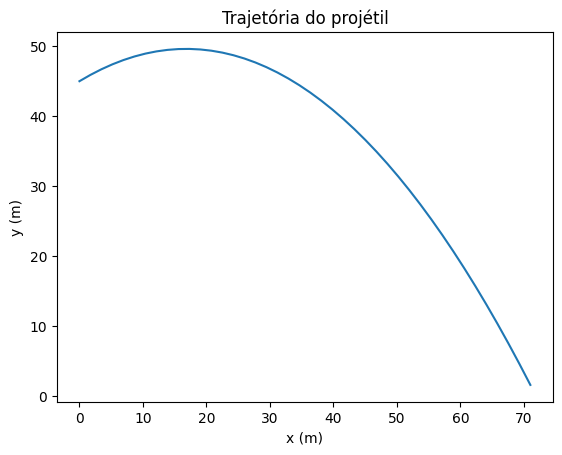

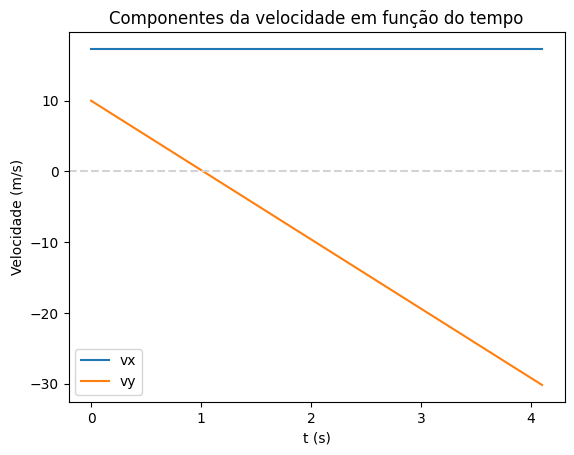

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt

# constantes e condições iniciais
g = 9.8                     # m/s²
theta = math.radians(30)    # ângulo de 30° convertido para radianos
v0 = 20.0                   # m/s
h0 = 45.0                   # m
dt = 0.1                    # passo de tempo (s)

# componentes iniciais da velocidade
vx = v0 * math.cos(theta)
vy = v0 * math.sin(theta)

# estado inicial
t = 0.0
x = 0.0
y = h0

# listas para armazenar dados
times, xs, ys, vxs, vys, speeds = [], [], [], [], [], []

# simulação até a colisão com o solo
while y >= 0:
    times.append(t)
    xs.append(x)
    ys.append(y)
    vxs.append(vx)
    vys.append(vy)
    speeds.append(math.hypot(vx, vy))
    
    t += dt
    x += vx * dt
    vy -= g * dt
    y += vy * dt

# cria DataFrame
df = pd.DataFrame({
    't (s)': times,
    'x (m)': xs,
    'y (m)': ys,
    'vx (m/s)': vxs,
    'vy (m/s)': vys,
    '|v| (m/s)': speeds
})

# gráfico 1: trajetória (x vs y)
plt.figure()
plt.plot(df['x (m)'], df['y (m)'])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajetória do projétil')
plt.show()

# gráfico 2: componentes de velocidade vs tempo com linha de marcação em y=0
plt.figure()
plt.plot(df['t (s)'], df['vx (m/s)'], label='vx')
plt.plot(df['t (s)'], df['vy (m/s)'], label='vy')
plt.axhline(0, color='lightgray', linestyle='--')  # linha pontilhada em y=0
plt.xlabel('t (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Componentes da velocidade em função do tempo')
plt.legend()
plt.show()
